# Proyecto EDA: Airbnb  
**Autor:** Óscar Fernández-Chinchilla López

![Logo Airbnb](../images/airbnb-logo.png)



# 📚 Índice

   1. [Carga de datos](#carga-de-datos)

      - [Importación del librerias y dependencias](#imporatacion-librerias)
      - [Importación del dataset](#imporatacion-dataset)
      - [Revision de dimensiones y filas](#revision)
      - [Inspección de tipos de datos](#inspeccion-datos)

2. [Exploración del dataset](#exploracion)

3. [Tareas obligatorias](#tareas-obligatorias)

   3.1 [Carga del dataset](#carga-del-dataset)  
   3.2 [Exploración del dataset](#exploracion-del-dataset)  
   3.3 [Limpieza y normalización](#limpieza-y-normalizacion)  
   3.4 [Visualizaciones básicas](#visualizaciones-basicas)  
   3.5 [Conclusiones exploratorias](#conclusiones-exploratorias)

<a id="imporatacion-librerias"></a>
# Importación de librerias
### Para el proyecto utilizare librerias como pandas y numpy entre otras.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a id="imporatacion-dataset"></a>
# Importación del dataset

In [2]:
airbnb_df = pd.read_csv("../data/Airbnb_Open_Data.csv", low_memory=False) # Añado el parametro low_memory para que no salga el aviso de datos mezclados del csv


<a id="revision"></a>
# Comprobación inicial de las dimensiones del dataset

In [4]:
# Compruebo las dimensiones del dataframe
airbnb_df.shape

(102599, 26)

In [ ]:
# Muestro las primeras 3 filas para comprobar como estan las columnas y filas del dataset en crudo y a primera vista
airbnb_df.head(3)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN


In [5]:
# Muestro las ultimas 3 filas 
airbnb_df.tail(3)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.1,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


In [8]:
# Muestro todas las columnas del dataframe
airbnb_df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

<a id="inspeccion-datos"></a>
# Inspección de datos básico

In [ ]:
# Muestro el tipo de datos que contiene cada columna para verificar si alguna no tiene el tipo que deberia
airbnb_df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

<a id="exploración"></a>
# Exploración del dataset
### En este apartado exploraremos todas las columnas para comprobar cual contiene duplicados, nulos y columnas irrelevantes para el análisis y asi luego proceder con la limpieza del dataset.

In [ ]:
# Comprobamos la columna de Id para ver si contiene duplicados
airbnb_df["id"].duplicated().sum()

np.int64(541)

In [72]:
# Sacamos los valores duplicados y los ordenamos por id para ver si son exactamente el mismo anuncio
airbnb_df[airbnb_df["id"].duplicated(keep=False)].sort_values("id").head(2)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
9098,6026161,Upper East Side 2 bedroom- close to Hospitals-,65193709566,verified,Juliana,Manhattan,Upper East Side,40.76222,-73.9603,United States,...,$21,30.0,2.0,6/8/2019,0.21,3.0,34.0,157.0,NaN,NaN
102474,6026161,Upper East Side 2 bedroom- close to Hospitals-,65193709566,verified,Juliana,Manhattan,Upper East Side,40.76222,-73.9603,United States,...,$21,30.0,2.0,6/8/2019,0.21,3.0,34.0,157.0,NaN,NaN


## Comprobación de duplicados, nulos y tipos de cada columna
### Para no realizar el paso anterior 2 veces por columna, creamos el siguiente dataframe para que nos de toda la informacion de una sola vez.

In [3]:
airbnb_exploratory = pd.DataFrame({
        "nulos" : airbnb_df.isna().sum(),
        "duplicados" : airbnb_df.apply(lambda columna: columna.duplicated().sum()),
        "tipo" : airbnb_df.dtypes
})
airbnb_exploratory

,nulos,duplicados,tipo
id,0,541,int64
NAME,250,41317,object
host id,0,542,int64
host_identity_verified,289,102596,object
host name,406,89408,object
neighbourhood group,29,102591,object
neighbourhood,16,102374,object
lat,8,80607,float64
long,8,84824,float64
country,532,102597,object


### Revisión de algunas columnas sospechosas

In [5]:
non_numeric_cols = airbnb_df.select_dtypes(exclude=['number']).columns
non_numeric_cols


Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'country', 'country code', 'instant_bookable',
       'cancellation_policy', 'room type', 'price', 'service fee',
       'last review', 'house_rules', 'license'],
      dtype='object')

In [134]:
columna_categoria_list = [
    "host_identity_verified",
    "instant_bookable",
    "cancellation_policy",
    "room type",
    "country",
    "country code",
    "neighbourhood group",
    "neighbourhood",
    "license"   
]
for i in columna_categoria_list:
    print(f"Columna: {i}")
    print(airbnb_df[i].unique())

Columna: host_identity_verified
['unconfirmed' 'verified' nan]
Columna: instant_bookable
[False True nan]
Columna: cancellation_policy
['strict' 'moderate' 'flexible' nan]
Columna: room type
['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']
Columna: country
['United States' nan]
Columna: country code
['US' nan]
Columna: neighbourhood group
['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' nan 'Staten Island'
 'Bronx']
Columna: neighbourhood
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Co

## Comprobación del rango de todas las variables numéricas del dataset

In [7]:
# Utilizo describe porque aporta toda la informacion como máximo, mínimo, media, etc.
airbnb_df.describe().round(2)

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,102599.00,1.025990e+05,102591.00,102591.00,102385.00,102190.00,102416.00,86720.00,102273.00,102280.00,102151.00
mean,29146234.52,4.925411e+10,40.73,-73.95,2012.49,8.14,27.48,1.37,3.28,7.94,141.13
std,16257505.61,2.853900e+10,0.06,0.05,5.77,30.55,49.51,1.75,1.28,32.22,135.44
min,1001254.00,1.236005e+08,40.50,-74.25,2003.00,-1223.00,0.00,0.01,1.00,1.00,-10.00
25%,15085814.50,2.458333e+10,40.69,-73.98,2007.00,2.00,1.00,0.22,2.00,1.00,3.00
50%,29136603.00,4.911774e+10,40.72,-73.95,2012.00,3.00,7.00,0.74,3.00,1.00,96.00
75%,43201198.00,7.399650e+10,40.76,-73.93,2017.00,5.00,30.00,2.00,4.00,2.00,269.00
max,57367417.00,9.876313e+10,40.92,-73.71,2022.00,5645.00,1024.00,90.00,5.00,332.00,3677.00


# Para seguir buscando incoherencias, analizaré individualmente algunas columnas

In [6]:
# Dado que la disponibilidad se comprende de 0 a 365 dias, buscamos si hay filas con valores negativos en esta columna
airbnb_df[(airbnb_df["availability 365"] < 0)].shape

(432, 26)

In [ ]:
# Lo mismo ocurre si hay filas con valores de disponibilidad superiores a 365
airbnb_df[(airbnb_df["availability 365"] > 365)].shape

(2782, 26)

In [ ]:
# Debe haber al menos un minimo de noches para hospedarse, por lo que el valor no puede ser negativo o 0
airbnb_df[(airbnb_df["minimum nights"] <= 0)].shape

(13, 26)

In [ ]:
# No puede haber un numero total de reviews sin que tenga una media de reviews por mes
airbnb_df[(airbnb_df["number of reviews"] > 0) & (airbnb_df["reviews per month"] <= 0)].shape

(0, 26)

In [ ]:
# Se aplica viceversa que la celda anterior, no puedes tener una media de reviews por mes con un total de 0 reviews o negativo
airbnb_df[(airbnb_df["reviews per month"] > 0) & (airbnb_df["number of reviews"] <= 0)].shape

(0, 26)

In [ ]:
# No tiene coherencia que haya una media de las reviews en pisos que tienen un numero total de reviews igual o inferior a 0
airbnb_df[(airbnb_df["review rate number"] > 0) & (airbnb_df["number of reviews"] <= 0)].shape

(15701, 26)

In [ ]:
# Cuando un host da de alta un anuncio, al menos debe aparecer con 1, sino indicaria incoherencia
airbnb_df[(airbnb_df["calculated host listings count"] <= 0)].shape

(0, 26)

In [ ]:
# Establezco limites para pisos muy antiguos o que pongan que se hayan construido en un año mas en el futuro que en el que estamos
airbnb_df[(airbnb_df["Construction year"] < 1850) & (airbnb_df["Construction year"] >2025)].shape

(0, 26)

## Incoherencias que se han podido observar:
- Hay anuncios de pisos que estan duplicados (por id del anuncio)
- Columnas como "price" y "service fee" aparecen como objeto y no como integer o float 
- La columna "Construction year" seria mejor que fuese de tipo Integer y no float
- La columna de "license" esta completamente llena de nulos 
- La mitad de la columna "house_rules" aparece como nula 
- La columna "instant_bookable" contiene valores True o False pero aparece como Object, lo que indica que estan puestos como String
- Hay valores mal escritos en las columnas categoricas de "neighbourhood group"
- Hay valores en la columna "availability 365" que son o menores que 0, o mayores de 365
- Es incoherente que la columna de "minimum nights" tenga valores negativos
- En cuanto a la media de reviews de un anuncio, es incoherente que para las que tengan un número total igual a 0, su media sea mayor a 0.

# Distribución inicial de las columnas
## Usaremos histogramas y graficos de barras iniciales para ver como se distribuyen los datos del dataset antes de la limpieza

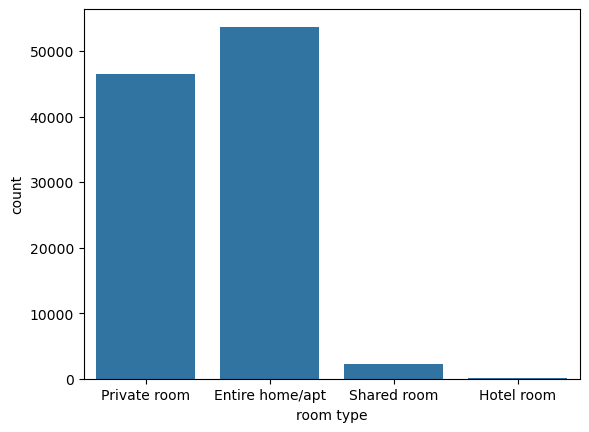

In [ ]:
# Aqui realizo un grafico de barras para la variable categorica de "room types", la cual aparece sin mucha anomalia
sns.countplot(x=airbnb_df["room type"])
plt.show()

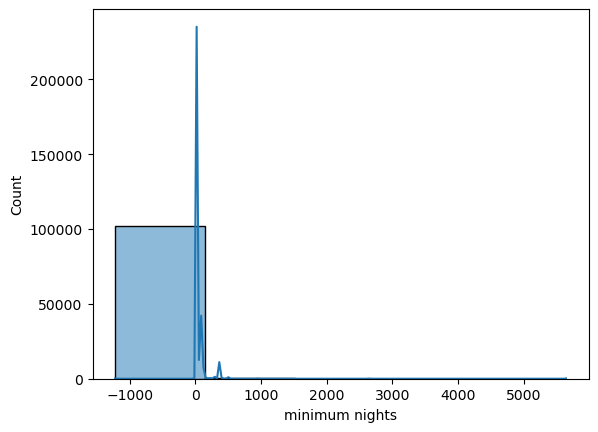

In [ ]:
# Aqui realizamos un histograma de las columna "minimum nights" para comprobar si hay valores anomalos o outliers antes de la limpieza.
sns.histplot(x=airbnb_df["minimum nights"], bins=5, kde=True)
plt.show();

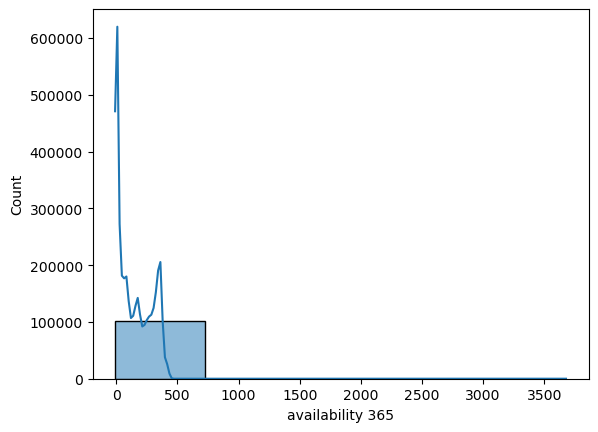

In [ ]:
# Aqui realizamos un histograma de las columna "availability 365", donde también podemos ver gran cantidad de outliers
sns.histplot(x=airbnb_df["availability 365"], bins=5, kde=True)
plt.show();

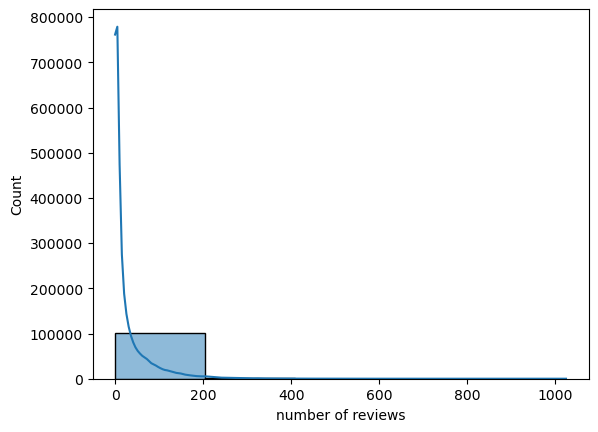

In [ ]:
# Hacemos otro histograma para el analisis visual de la columna "number of reviews"
sns.histplot(x=airbnb_df["number of reviews"], bins=5, kde=True)
plt.show();

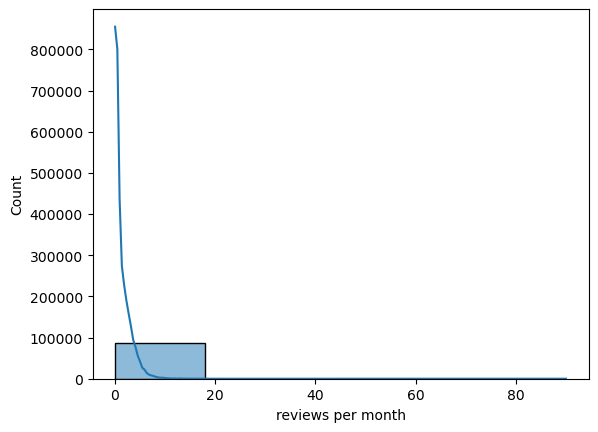

In [ ]:
# Y otro mas para la columna "reviews per month"
sns.histplot(x=airbnb_df["reviews per month"], bins=5, kde=True)
plt.show();

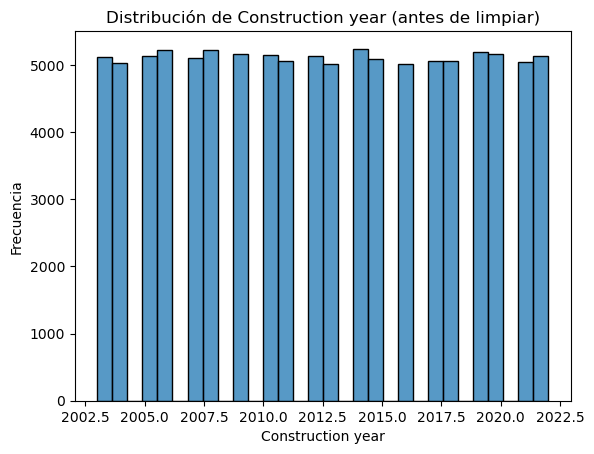

In [16]:
sns.histplot(airbnb_df["Construction year"], bins=30)
plt.title("Distribución de Construction year (antes de limpiar)")
plt.xlabel("Construction year")
plt.ylabel("Frecuencia")
plt.show()